<a href="https://colab.research.google.com/github/sandhya-8368/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team(Data Newbies)
##### **Team Member 1 -**Rohit Raj
##### **Team Member 2 -**Ranjita Raj
##### **Team Member 3 -**Sandhyarani Patra


# **Project Summary -**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, you are required to do

Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features x

# **GitHub Link -**

https://github.com/sandhya-8368/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

Dataset Description -
1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv",encoding="latin1")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

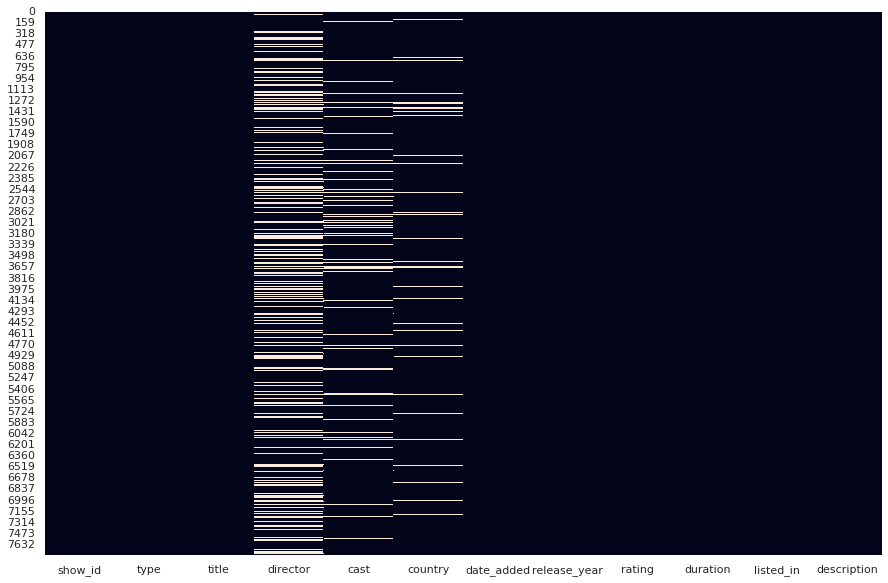

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

In the above dataset director column have maximum 2398 null value followed by cast,country,date_added and rating columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(i,df[i].nunique())
     


show_id 7787
type 2
title 7787
director 4049
cast 6831
country 681
date_added 1565
release_year 73
rating 14
duration 216
listed_in 492
description 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

In [ ]:
#release county
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
#gener
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df.listed_in.value_counts()    

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [ ]:
df['date_added '] = pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [ ]:
df.drop('date_added', axis=1, inplace=True)

In [ ]:
df.shape

(7777, 14)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added
0,s1,TV Show,3%,Unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018-12-20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017-11-16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020


In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
#main lead
df['main_lead'] = df['cast'].apply(lambda x: x.split(',')[0])
df.main_lead.value_counts()    

Unknown              718
Shah Rukh Khan        27
Akshay Kumar          22
Adam Sandler          19
Amitabh Bachchan      18
                    ... 
Lars Mikkelsen         1
Mason Vale Cotton      1
Kim Tae-hee            1
Kohei Amasaki          1
Adriano Zumbo          1
Name: main_lead, Length: 4905, dtype: int64

In [ ]:

# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   int64         
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  date_added    7777 non-null   datetime64[ns]
 12  month_added   7777 non-null   int64         
 13  year_added    7777 non-null   int64         
 14  main_lead     7777 non-null   object        
dtypes: datetime64[ns](1), int64(4), object

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies vs TV Shows ')

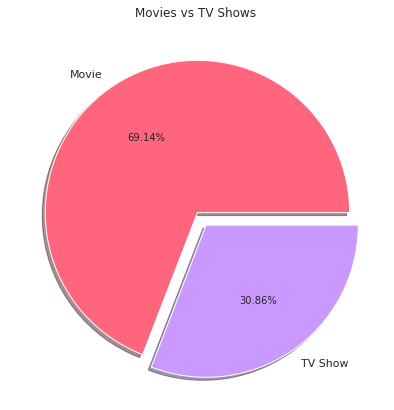

In [ ]:
# Number of Movies and TV Shows in the dataset
my_colors = ['#ff667d','#ca99ff']
my_explode = (0,0.1)
plt.figure(figsize=(7,7))
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%', shadow =True, colors = my_colors, explode=my_explode )
plt.ylabel('')
plt.title('Movies vs TV Shows ')
     

##### 1. Why did you pick the specific chart?

Pie charts shine when you need to assess the relative sizes of categories to the entire dataset.

##### 2. What is/are the insight(s) found from the chart?

There are about 70% movies and 30% TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

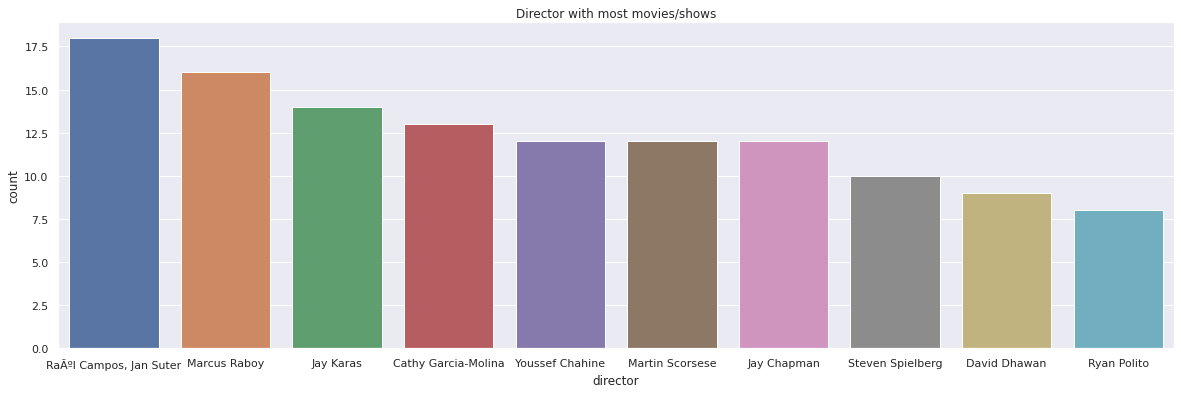

In [ ]:
#top 10 directors on Netflix

plt.figure(figsize = (20,6))
sns.countplot(x='director',data=df,order=df[~(df['director']=='Unknown')].director.value_counts().index[0:10])
plt.title('Director with most movies/shows')
plt.show()

##### 1. Why did you pick the specific chart?

 It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Sulter collectively have the most shows  follwed by Marcus Raboy and Jay Karas on Netflix

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0, 0.5, 'value')

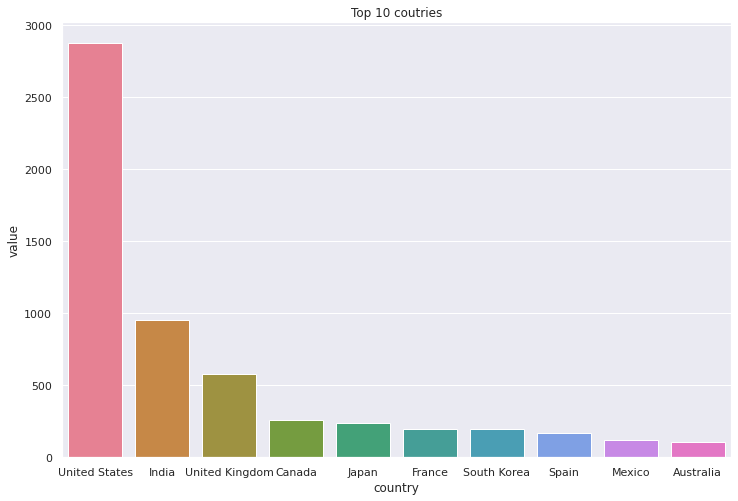

In [ ]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='country',data=df,
              order=df[~(df['country']=='Unknown')].country.value_counts().index[0:10],palette='husl')

plt.title('Top 10 coutries')
plt.xlabel('country')
plt.ylabel('value')

##### 1. Why did you pick the specific chart?

It shows the relationship between a numeric and a categoric variable.Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

united States has highest number of shows on netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

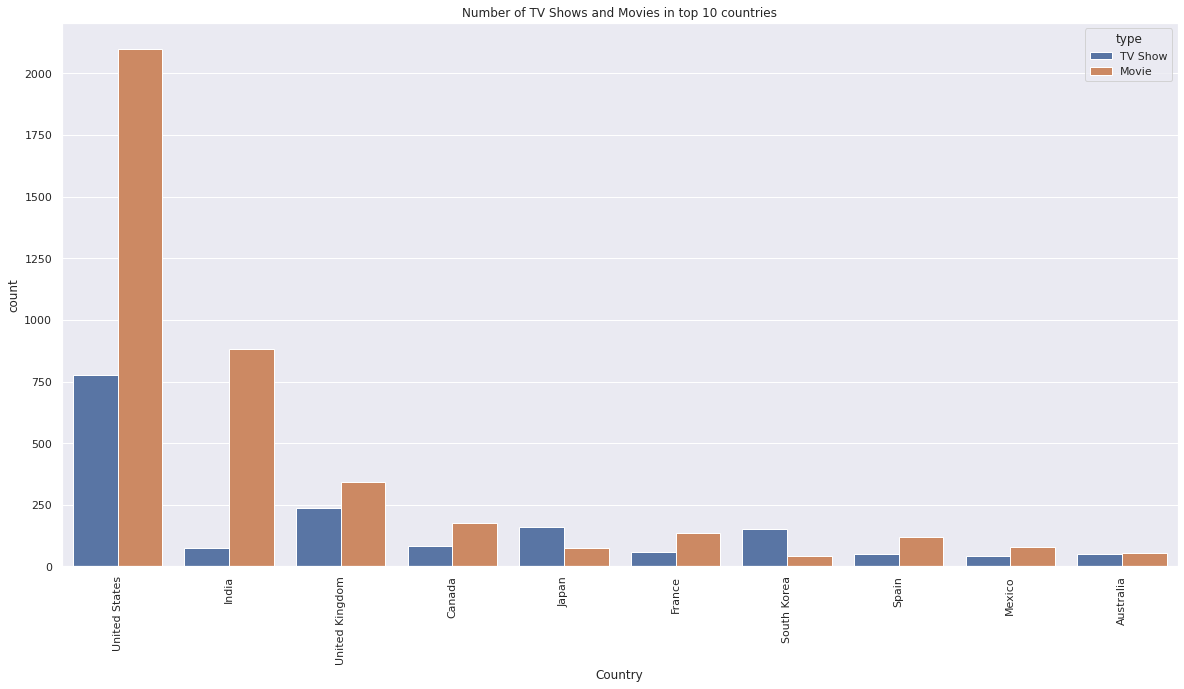

In [ ]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(20,10))
ax=sns.countplot(x="country",data= df,hue= "type",order = df[~(df['country']=='Unknown')].country.value_counts().index[0:10])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries")
plt.show()

##### 1. Why did you pick the specific chart?

A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects.

##### 2. What is/are the insight(s) found from the chart?

Most of the countries have more movies than TV shows on Netflix.
But in South Korea and Japan it's vice versa. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0, 0.5, 'value')

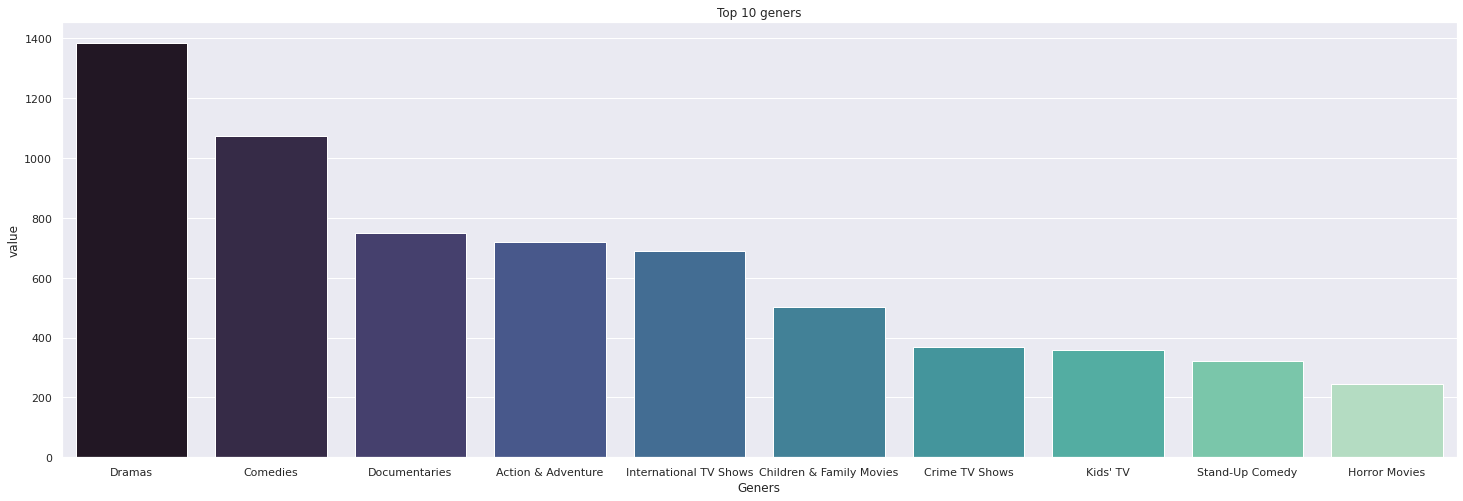

In [ ]:
# top 10 geners on netflix
plt.figure(figsize=(25,8))
ax=sns.countplot(x='listed_in',data=df,order=df['listed_in'].value_counts().index[0:10],palette="mako")

plt.title('Top 10 geners')
plt.xlabel('Geners')
plt.ylabel('value')

##### 1. Why did you pick the specific chart?

It shows the relationship between a numeric and a categoric variable.Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.



##### 2. What is/are the insight(s) found from the chart?

Drama is the most popular gener on Netflix follwed by comedies and Documentries.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

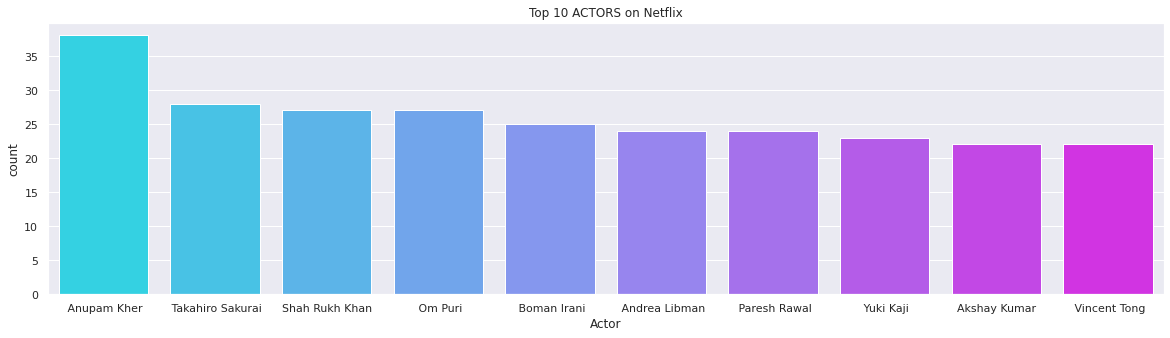

In [ ]:
#getting plot for top actors

#splitting into list
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []

#count movies for each actor
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(20,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="cool")
plt.title("Top 10 ACTORS on Netflix")
plt.xlabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

##### 2. What is/are the insight(s) found from the chart?

Anupam kher has more of the shows  on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

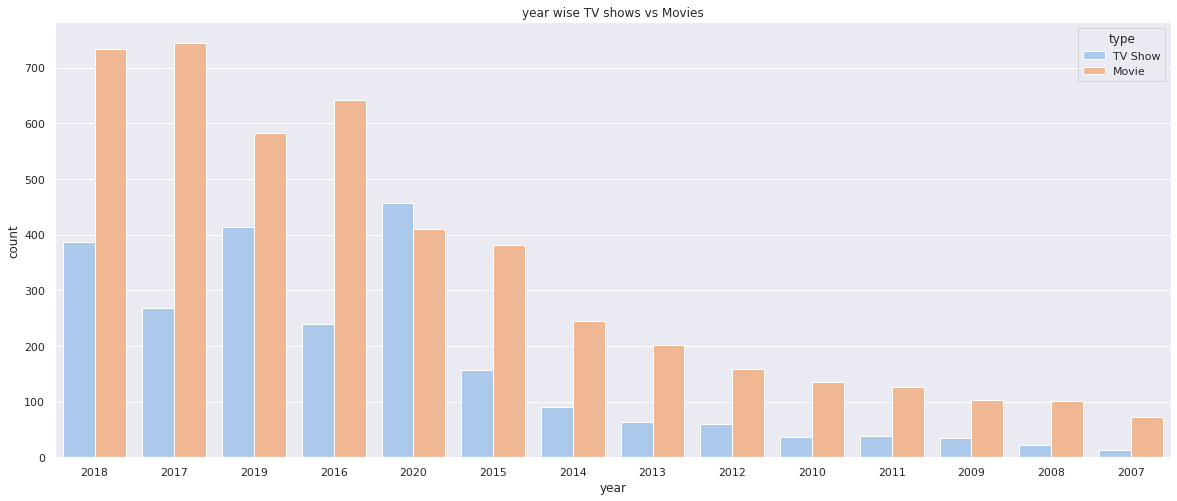

In [ ]:
#year wise shows
sns.set()
plt.figure(figsize=(20,8))
ax=sns.countplot(x="release_year",data= df,hue= "type",order = df['release_year'].value_counts().index[0:14],palette='pastel')
plt.xlabel('year')
plt.title("year wise TV shows vs Movies")
plt.show()

##### 1. Why did you pick the specific chart?

It shows the relationship between a numeric and a categoric variable.Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.



##### 2. What is/are the insight(s) found from the chart?

Before 2019 Movies are highest number of released but 2020 and 2021 TV shows are the highest number of released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
#encoding of release_day column with corresponding week day name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month_added']=df['month_added'].map(month_dict)

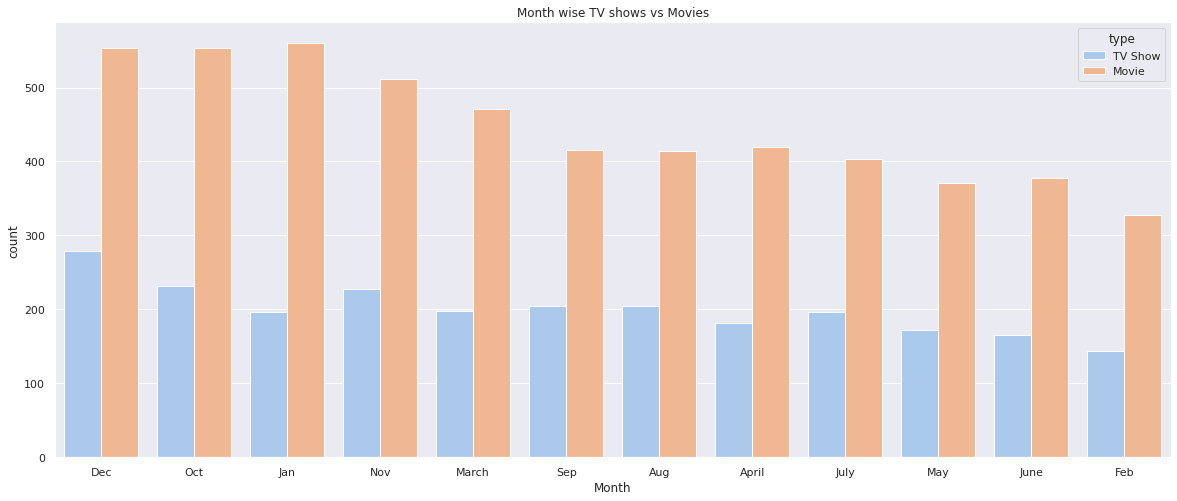

In [ ]:
#month wise shows
sns.set()
plt.figure(figsize=(20,8))
ax=sns.countplot(x="month_added",data= df,hue= "type",order = df['month_added'].value_counts().index[0:12],palette='pastel')
plt.xlabel('Month')
plt.title("Month wise TV shows vs Movies")
plt.show()

##### 1. Why did you pick the specific chart?

A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects.

##### 2. What is/are the insight(s) found from the chart?

Number of movies and TV shows added over the month January most followed by october and december

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

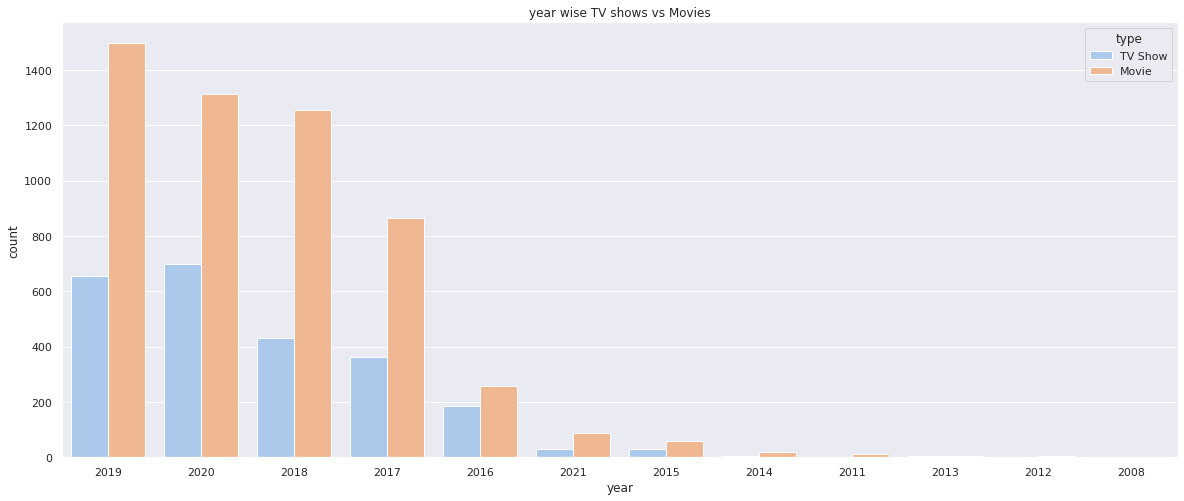

In [ ]:
#year wise shows
sns.set()
plt.figure(figsize=(20,8))
ax=sns.countplot(x="year_added",data= df,hue= "type",order = df['year_added'].value_counts().index[0:12],palette='pastel')
plt.xlabel('year')
plt.title("year wise TV shows vs Movies")
plt.show()

     
     

##### 1. Why did you pick the specific chart?

A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects.

##### 2. What is/are the insight(s) found from the chart?

Number of movies and TV shows added over the years 2019 most followed by 2020 and 2018

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

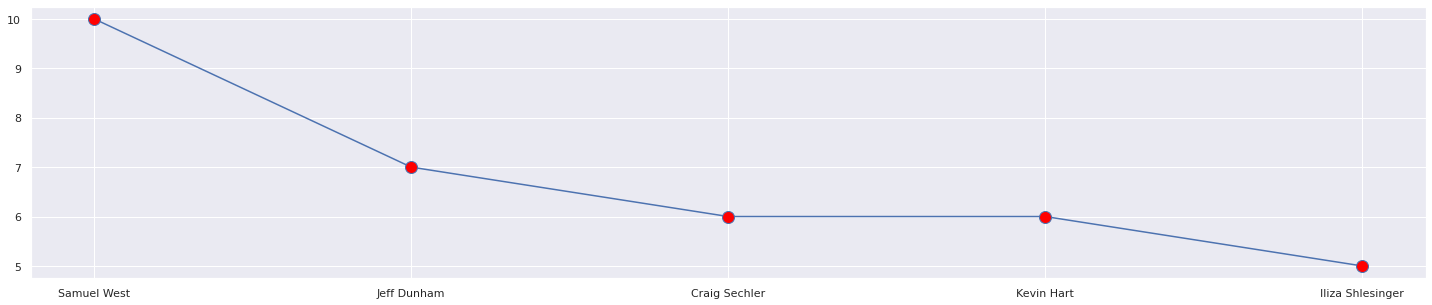

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(5),linestyle = 'solid', marker = 'o',markerfacecolor = 'red', markersize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Used for univariant set of observations .One axis of the plot shows the specific categories being compared, and the other axis represents a measured value

##### 2. What is/are the insight(s) found from the chart?

Samuel West has higest number of movies ,second highest  jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

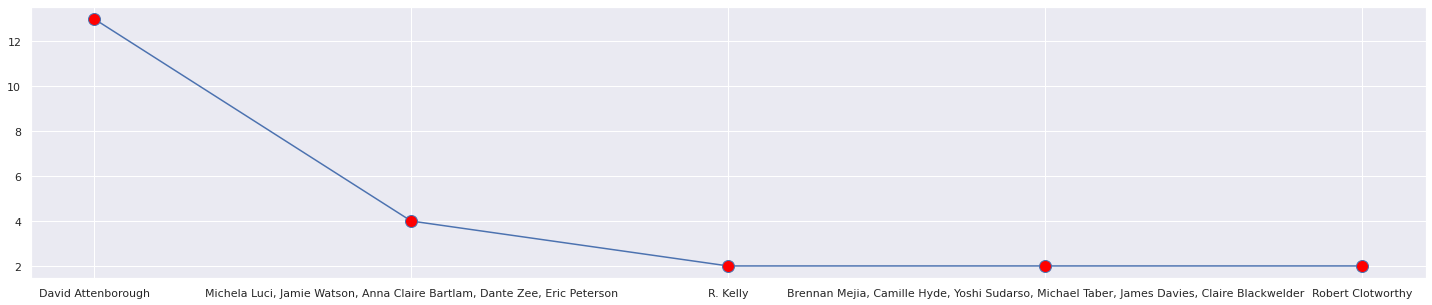

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(5),linestyle = 'solid', marker = 'o',markerfacecolor = 'red', markersize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Used for univariant set of observations .One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

##### 2. What is/are the insight(s) found from the chart?

David Attenborough has highest no of TV shows,second highest  Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson and third higest RKelly on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

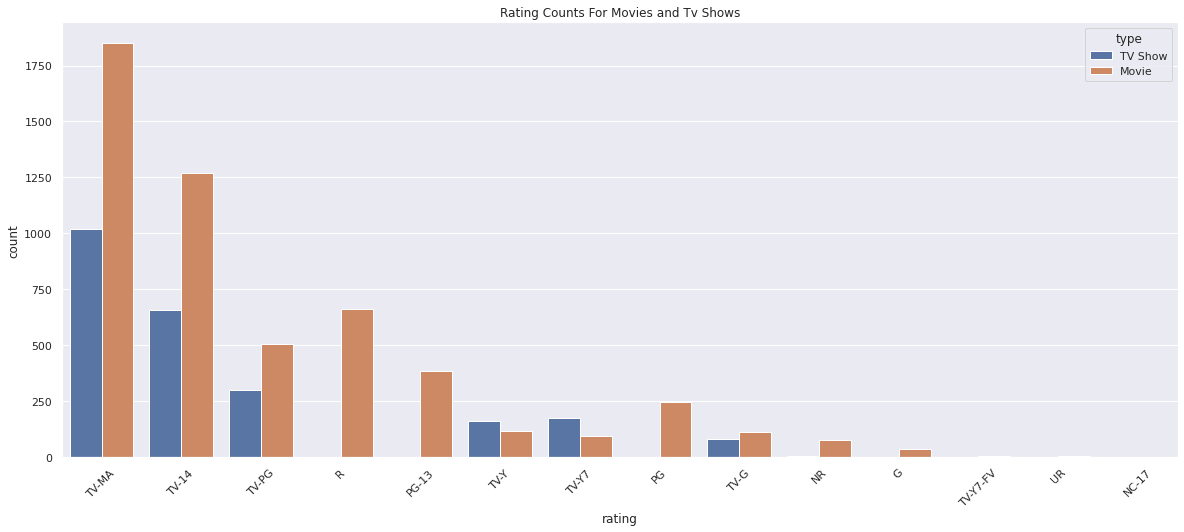

In [ ]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(20,8))
ax=sns.countplot(x="rating",data= df,hue= "type",order = df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()

##### 1. Why did you pick the specific chart?

This is  used to Show the counts ofobservations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

TV-MA is the highest rating in both type  followed by TV-14 .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, 'No of seasons in TV Shows ')

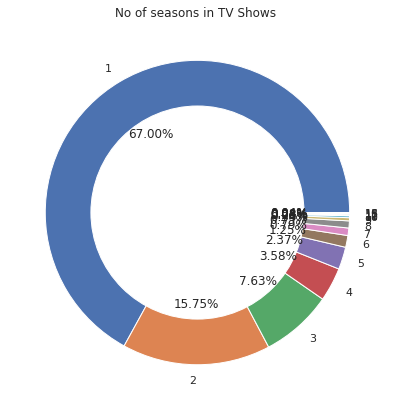

In [ ]:
# Number of seasons on TV Shows 
plt.figure(figsize=(10,7))
TV_Show = df[df['type']=='TV Show']
TV_Show['duration'].value_counts().plot(kind='pie',autopct='%1.2f%%')
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Add Legends
plt.ylabel('')
plt.title('No of seasons in TV Shows ')
     

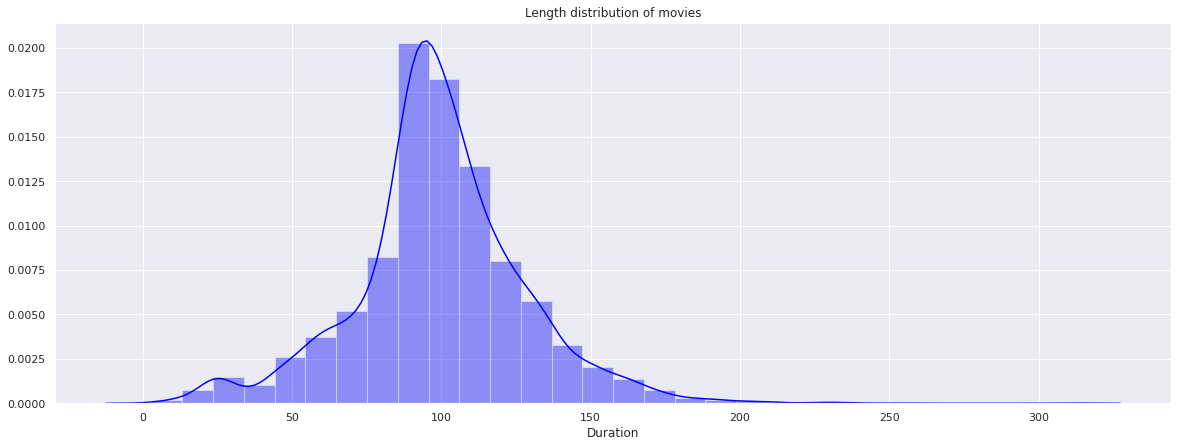

In [ ]:
# Length distribution of movies
movie = df[df['type']=='Movie']

plt.figure(figsize=(20, 7))
sns.distplot(movie['duration'], bins=30,color='Blue').set(ylabel=None)
plt.title('Length distribution of movies')
plt.xlabel('Duration')

plt.show()

##### 1. Why did you pick the specific chart?

To have a general sense of the part-to-whole relationship in  data. 
Used for univariant set of observations and visualizes it through histogram

##### 2. What is/are the insight(s) found from the chart?

Most of the TV Shows have very less season like 67% have only 1 season.
0 to 100 duration movies are increases and 100 to 200 duration duration are decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
#plotting heatmap
conted_added = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)
conted_added

month_added,April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
year_added,,,,,,,,,,,,
2008,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,1.0
2012,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0
2014,2.0,1.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0
2015,5.0,2.0,23.0,4.0,1.0,8.0,7.0,5.0,7.0,4.0,15.0,7.0
2016,22.0,41.0,96.0,16.0,44.0,29.0,19.0,17.0,13.0,46.0,52.0,48.0


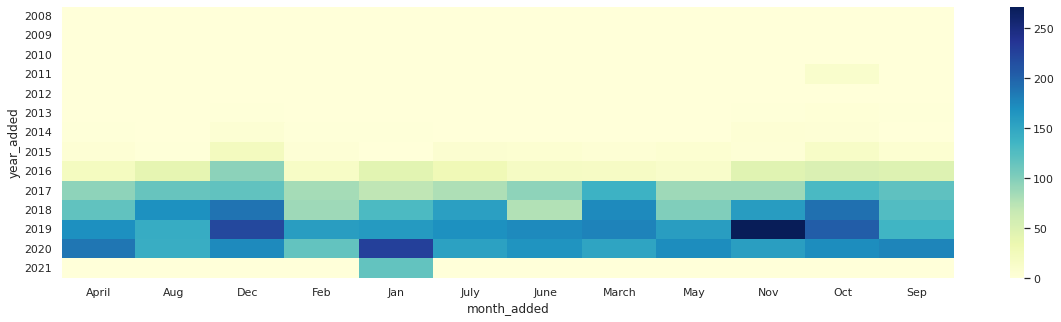

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.heatmap(conted_added,cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

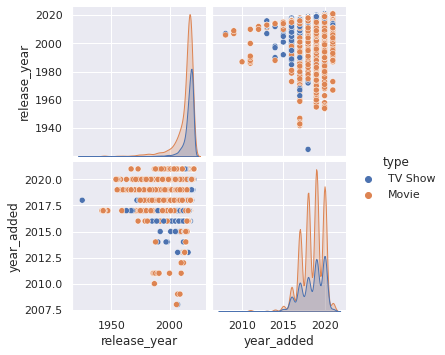

In [ ]:
sns.pairplot(df,x_vars=["release_year", "year_added"],y_vars=["release_year", "year_added"],hue='type')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 Number of TV shows on Netflix have tripled and number of movies have reduced by 2000 between 2010 and 2018.

#### 2. Perform an appropriate statistical test.

Text(0, 0.5, 'Counts')

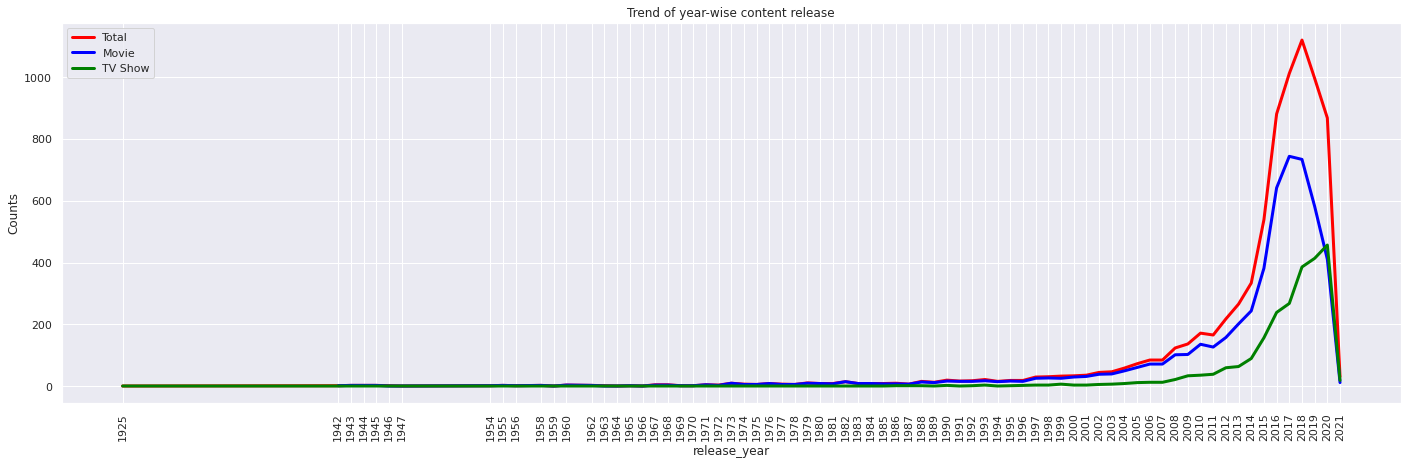

In [ ]:
# Perform Statistical Test to obtain P-Value
year_data = df['release_year'].value_counts().sort_index().loc[:2021]
type_data = df.groupby('release_year')['type'].value_counts().unstack().loc[:2021]


plt.figure(figsize=(24,7))

sns.lineplot(x=year_data.index,y=year_data,color = 'red', linewidth=3, label='Total')
sns.lineplot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
sns.lineplot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

plt.xticks(year_data.index.unique())
plt.title("Trend of year-wise content release")
plt.xticks(rotation = 90)
plt.ylabel('Counts')


Text(0, 0.5, 'Count of content added')

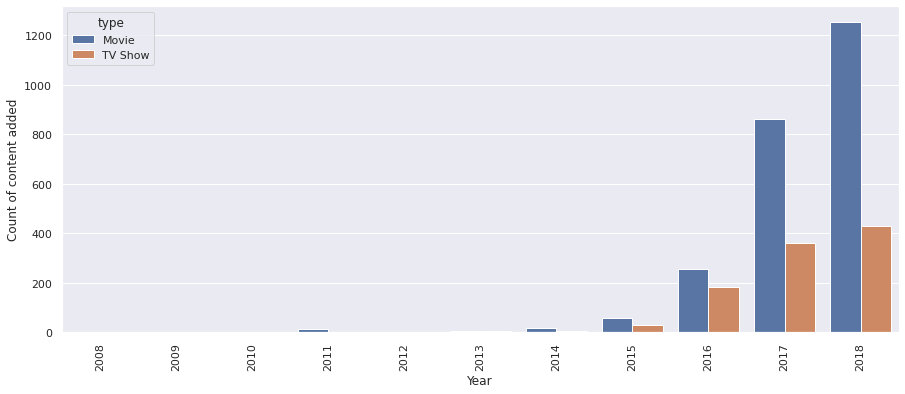

In [ ]:
#Checking the trend between 2010 and 2018
df_2010 = df[df['year_added']>=2010]
df_2k10_18 = df[df['year_added']<=2018]
#overall year_added analysis
plt.figure(figsize=(15,6))
sns.countplot(df_2k10_18["year_added"],hue=df_2k10_18["type"])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count of content added')

##### Which statistical test have you done to obtain P-Value?

There is no decline in the number of movies.Also number of movies added has always been more than the number of tv shows added. So with this information, we hereby reject our Hypothesis.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
Dataset = df.copy()

In [ ]:
# Combining all the clustering attributes into a single column

Dataset['clustering'] = (Dataset['director'] + ' ' + 
                                Dataset['cast'] +' ' + 
                                Dataset['country'] +' ' + 
                                Dataset['listed_in'] +' ' + 
                                Dataset['description'])

In [ ]:
# Select the 1 number of clusters for the dataset 
Dataset['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

#### 2. Lower Casing

In [ ]:
import re
# Lower Casing
Dataset['clustering']=Dataset['clustering'].apply(lambda x:x.lower())

In [ ]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]

"rajkumar hirani aamir khan, kareena kapoor, madhavan, sharman joshi, omi vaidya, boman irani, mona singh, javed jaffrey india comedies while attending one of india's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

#### 3. Removing Punctuations

In [ ]:
#REMOVING PUNCTUATIONS
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [ ]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]

'rajkumar hirani aamir khan  kareena kapoor  madhavan  sharman joshi  omi vaidya  boman irani  mona singh  javed jaffrey india comedies while attending one of india s premier colleges  three miserable engineering students and best friends struggle to beat the school s draconian system '

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [ ]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]

'rajkumar hirani aamir khan  kareena kapoor  madhavan  sharman joshi  omi vaidya  boman irani  mona singh  javed jaffrey india comedies while attending one of india s premier colleges  three miserable engineering students and best friends struggle to beat the school s draconian system '

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)
     

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
Dataset['clustering'] = Dataset['clustering'].apply(remove_stopwords)

In [ ]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one india premier colleges three miserable engineering students best friends struggle beat school draconian system'

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()
     

In [ ]:
#Create text column based on dataset
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))
     

In [ ]:
# Select the 100 number of Tokenization for the dataset 
print(Dataset['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'india', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'school', 'draconian', 'system']


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Rephrase Text
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
Dataset['clustering'] = lemmatize_verbs(Dataset['clustering'])
     

TypeError: ignored

In [ ]:
# Select the 100 number of clusters for the dataset 
print(Dataset['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'india', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'school', 'draconian', 'system']


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
clustering_vectorization = Dataset['clustering']

In [ ]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)
     

In [ ]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [ ]:
# convert X into array form for clustering
X = x.toarray()

In [ ]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

Text(0, 0.5, 'cumulative explained variance')

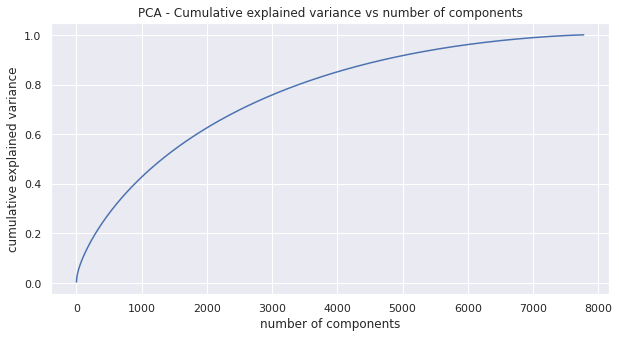

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape
     

(7777, 4000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

Text(0, 0.5, 'WCSS')

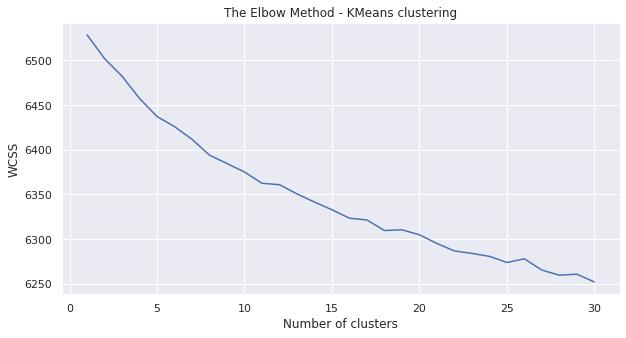

In [ ]:
# ML Model - 1 Implementation
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Fit the Algorithm

# Predict on the model

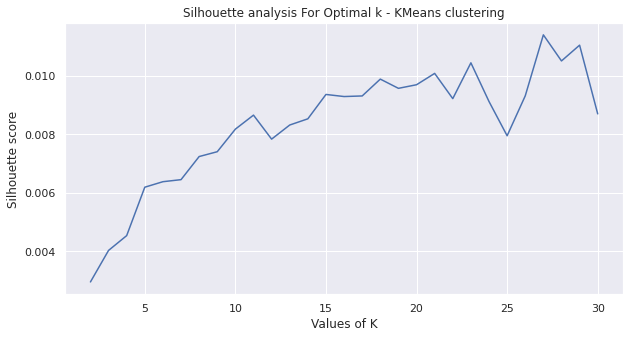

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)
     

KMeans(n_clusters=6, random_state=40)

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['kmeans_cluster'] = kmeans.labels_
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6427.228416609348, 0.005869091494665003)


Text(0.5, 1.0, 'Number of movies and TV shows in each cluster - Kmeans Clustering')

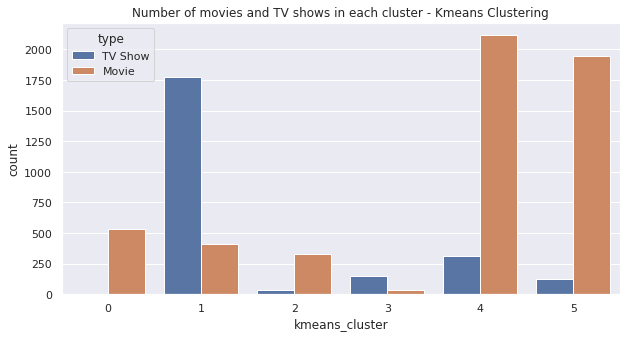

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=Dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

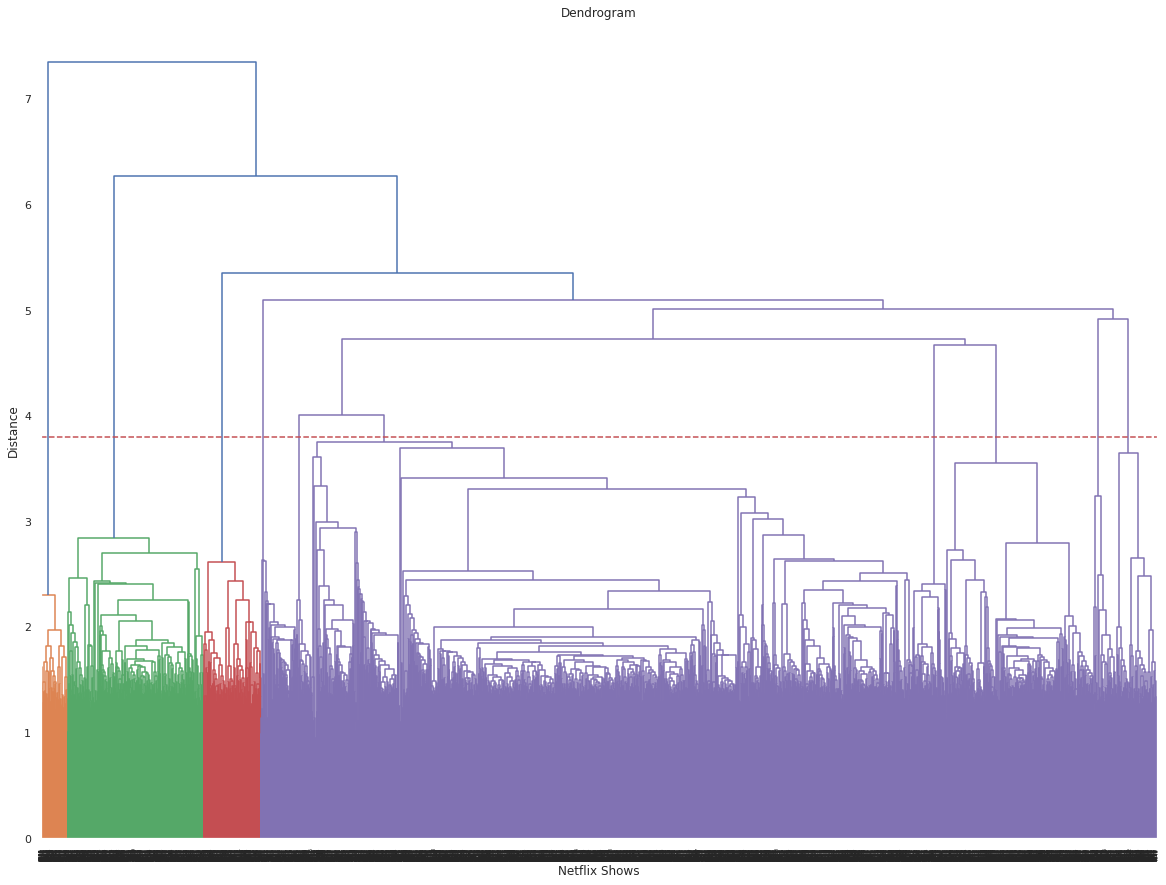

In [ ]:
# Visualizing evaluation Metric Score chart
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(20, 15))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([ 2, 10,  0, ...,  4,  4,  2])

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['hierarchical_cluster'] = hierarchical.labels_

Text(0.5, 1.0, 'Number of movies and tv shows in each cluster - Hierarchical Clustering')

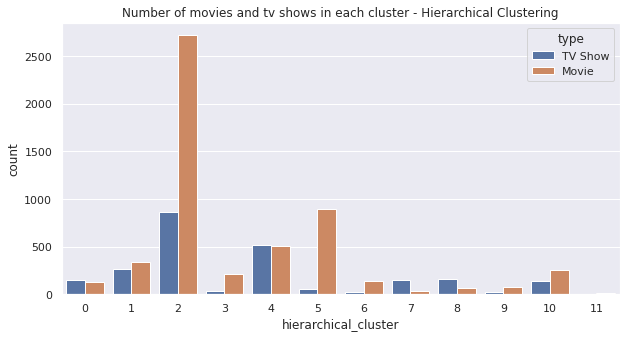

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Changing the index of the df from show id to show title
Dataset['show_id'] = Dataset.index

# converting tokens to string
def convert(lst):
  return ' '.join(lst)

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: convert(x))

# setting title of movies/Tv shows as index
Dataset.set_index('title',inplace=True)
     
# Fit the Algorithm

# Predict on the model

KeyError: ignored

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(Dataset['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)
     

In [ ]:
# Dataset Rows & Columns count
cosine_similarity.shape
     

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(Dataset.index)

def Dataset_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for '3 Idiot'
Dataset_10('The Hunt')
     

In [ ]:
# Recommendations for 'Peaky Blinders'
Dataset_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'Inside the Worldâ\x80\x99s Toughest Prisons',
 'The Blue Planet: A Natural History of the Oceans',
 'I AM A KILLER: RELEASED',
 'The Murder Detectives',
 'Loaded',
 'Botched Up Bodies',
 'Mega Food',
 'The Hunt',
 'The Frankenstein Chronicles']

In [ ]:
# Recommendations for 'Stranger Things'
Dataset_10('Stranger Things')
     

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Zombie Dumb',
 'Prank Encounters',
 'Kiss Me First',
 'Drug Lords',
 'Henry Danger',
 'Haunted',
 'Living Undocumented',
 'Shopkins']

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

2.The dataset contained about 7787 records, and 12 attributes. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

3.It was found that Netflix hosts more movies than TV shows on its platform.Also, majority of the shows were produced in the United States follwed by India and UK.TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.Majority of people like to watch Drama followed by comedy.

4.Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.

5.Done cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

6.Through TFIDF Vectorization, we created a total of 20000 attributes. We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000. We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

7.Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

8.A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***